# Derivative Matrix

This notebook is linked to the following
[blog post](https://harpaz.wordpress.com/2024/11/18/derivative-matrix/)
, and is based on the following
[YouTube video](https://www.youtube.com/watch?v=OZDM1VA-rU0)
by [Zundamon's theorem](https://www.youtube.com/@zunda-theorem)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

from IPython.display import display

init_printing(use_unicode=True)

# Derivative Matrix

In [2]:
def build_D(n: int) -> Matrix:
    result = zeros(n,n)
    for row in range(n-1):
        result[row, row+1] = Integer(row+1)
    return result

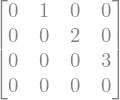

In [3]:
build_D(4)

Building the 2nd derivative

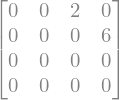

In [4]:
D4 = build_D(4)
D4 @ D4

Building the 3rd derivative

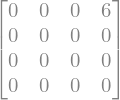

In [5]:
D4 @ D4 @ D4

Checking if it's hermitian, etc.

In [6]:
D5 = build_D(5)

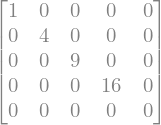

In [7]:
D5 @ D5.T

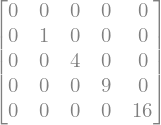

In [8]:
D5.T @ D5

## Integral Matrix

In [9]:
def build_I(n: int) -> Matrix:
    result = zeros(n,n)
    for row in range(1, n):
        result[row, row-1] = 1/Integer(row)
    return result

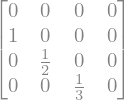

In [10]:
build_I(4)

In [11]:
I5 = build_I(5)

## Combining Integrals and Derivatives

First an integral, then a derivative

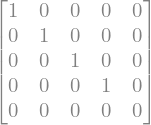

In [12]:
D5 @ I5

First a derivative, then an integral

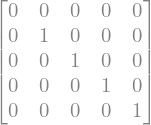

In [13]:
I5 @ D5

Taking the integral, and then the derivative
(That's `D5 * I5`)
Gives the identity matrix
(The last term is 0 since we're using finite matrices, while in reality both `D` and `I` are infinite matrices)

However, taking the derivative first and then the integral loses information : the constant term

Taking a second derivative

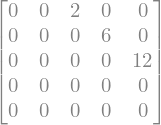

In [14]:
D5 @ D5

Taking a second integral

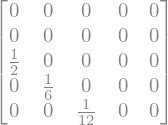

In [15]:
I5 @ I5

# Diagonal Derivative Matrix

Let's see if we can find a basis in which the derivative matrix is diagonal

In [16]:
try:
    D5.diagonalize()
except Exception as exc:
    print(f"Failed: {str(exc)}")
    print("Bummer")

Failed: Matrix is not diagonalizable
Bummer


In [17]:
try:
    I5.diagonalize()
except Exception as exc:
    print(f"Failed: {str(exc)}")
    print("Bummer")

Failed: Matrix is not diagonalizable
Bummer


Seems like there's no easy solution.

Let's try SVD

## SVD Derivative Matrix

Starting off with only looking at the singular values (with `sympy`)

In [18]:
D5.singular_values()

Next up, getting the SVD decomposition with `numpy`

In [19]:
D5_np = np.array(D5).astype(np.float64)
D5_np

array([[0., 1., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0.]])

In [20]:
svd_result_D = np.linalg.svd(D5_np)
display(svd_result_D.U)
display(svd_result_D.S)
display(svd_result_D.Vh)

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

array([4., 3., 2., 1., 0.])

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

</br>
</br>
Similarly, taking the SVD decomposition of $I_5$

In [21]:
I5_np = np.array(I5).astype(np.float64)
svd_result_I = np.linalg.svd(I5_np)
display(svd_result_I.U)
display(svd_result_I.S)
display(svd_result_I.Vh)

array([[ 0.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.]])

array([1.        , 0.5       , 0.33333333, 0.25      , 0.        ])

array([[-1., -0., -0., -0., -0.],
       [-0., -1., -0., -0., -0.],
       [-0., -0., -1., -0., -0.],
       [-0., -0., -0., -1., -0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Nice.

We can see that every term in the SVD of `D` looks symmetric
</br>
(a symmetric matrix satisfies $M^T=M$)
</br>
But `D` itself isn't symmetric.
</br>
So let's run a simple check, and see the SVD of $D^T$

In [22]:
svd_result_D_T = np.linalg.svd(D5_np.T)
display(svd_result_D_T.U)
display(svd_result_D_T.S)
display(svd_result_D_T.Vh)

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.]])

array([4., 3., 2., 1., 0.])

array([[-0., -0., -0., -1., -0.],
       [-0., -0., -1., -0., -0.],
       [-0., -1., -0., -0., -0.],
       [-1., -0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  1.]])

</br>
</br>
Now, let's calculate `D @ I` term by term, and see how the identity matrix takes form
</br>
Starting off, let's look at the rightmost-matrix of `D` multiplied by the leftmost-matrix of `I`

In [23]:
svd_result_D.Vh @ svd_result_I.U

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

and at the rightmost-matrix of `I` multiplied by the leftmost-matrix of `D`

In [24]:
svd_result_I.Vh @ svd_result_D.U

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Let's look at the full multiplication, and explore some of its parts

In [25]:
# D * I
(
    svd_result_D.U @ np.diag(svd_result_D.S) @ svd_result_D.Vh
    @
    svd_result_I.U @ np.diag(svd_result_I.S) @ svd_result_I.Vh
)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
(
    svd_result_D.Vh
    @
    svd_result_I.U
)

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [27]:
(
    np.diag(svd_result_D.S) @ svd_result_D.Vh
    @
    svd_result_I.U @ np.diag(svd_result_I.S)
)

array([[ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [28]:
(
    svd_result_D.U @ np.diag(svd_result_D.S) @ svd_result_D.Vh
    @
    svd_result_I.U @ np.diag(svd_result_I.S)
)

array([[-1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [29]:
(
    np.diag(svd_result_D.S) @ svd_result_D.Vh
    @
    svd_result_I.U @ np.diag(svd_result_I.S) @ svd_result_I.Vh
)

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

# Diagonal 2nd-Derivative Matrix

Having failed to find a diagonal basis for the derivative matrix,
let's try and find a basis for the second derivative.
</br>
We know that for the real derivative matrix (the infinite one), the basis is the Fourier basis.
</br>
Let's see if we can recreate it.

Small note on convention:

- denoting `D_p` for the Polynomial/Taylor basis
- denoting `D_f` for the Fourier basis

And `T` will be the transformation matrix
</br>
$v_f = T \cdot v_p$
</br>
for some vector $v$

Thus, using
</br>
$D_f v_f = D_f (T v_p) = (T T^{-1}) D_f T v_p = T (T^{-1} D_f T) v_p = T (D_p) v_p = T (D_p v_p)$
</br>
We get
</br>
$D_f = T^{-1} D_f T$

## Starting off - simple manual attempt (for $\sqrt{D}$)

Let's start small, with $3 \times 3$ matrices
</br>
And let's write the transformation matrix from the Fourier space to the Taylor/Polynomial one

- $cos(0 \cdot x) = 1 + 0 \cdot x + 0 \cdot x^2$
- $sin(1 \cdot x) = 0 + 1 \cdot x + 0 \cdot x^2$
- $cos(1 \cdot x) = 1 + 0 \cdot x - \frac{1}{2} \cdot x^2$

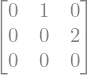

In [30]:
D3_p = build_D(3)
D3_p

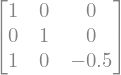

In [31]:
T3 = Matrix([
    [1, 0, 0],    # cos(0x)
    [0, 1, 0],    # sin(1x)
    [1, 0, -1/2]  # cos(1x)
])
T3

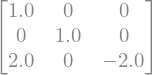

In [32]:
T3.inv()

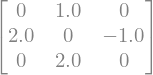

In [33]:
D3_f = T3.inv() * D3_p * T3
D3_f

Well, that doesn't seem exactly right...

How about the other way round?

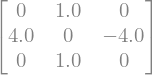

In [34]:
T3 * D3_p * T3.inv()

Nope.

## Generalizing the transformation matrix

In [35]:
num_terms = 5  # num terms
polynom_symbols = symbols(f"p_0:{num_terms}")
fourier_symbols = symbols(f"f_0:{num_terms}")

display(polynom_symbols)
display(fourier_symbols)

Calculating the amount of Fourier frequencies we'll have, based on $N$

In [36]:
# the first one is $cos(0)=1$
#    thus, `N-1`
# then, we have pairs
# but even if we have even `N` (thus, odd `N-1`), we still need another frequency
#    e.g. `N=4` : cos(0) , sin(1 x) , cos(1 x) , sin(2 x) 
import math
num_fourier_frequencies = math.ceil((num_terms-1)/2)

Generating all Fourier functions:

In [37]:
x = Symbol('x')

In [38]:
fourier_functions = []

for i in range(num_terms):
    frequency = (i+1) // 2
    if i%2 == 0:
        func = cos
    else:
        func = sin
    fourier_functions.append( func(frequency * x) )

fourier_functions

</br>
Extracting the fourier terms

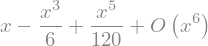

In [39]:
a = fourier_functions[1].series(x=x, x0=0, n=num_terms+1)
a

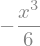

In [40]:
fourier_functions[1].taylor_term(3, x)

</br>
Let's see it in action:

0 0 1
0 1 0
0 2 0
0 3 0
0 4 0
1 0 0
1 1 x
1 2 0
1 3 -x**3/6
1 4 0
2 0 1
2 1 0
2 2 -x**2/2
2 3 0
2 4 x**4/24
3 0 0
3 1 x
3 2 0
3 3 -x**3/6
3 4 0
4 0 1
4 1 0
4 2 -x**2/2
4 3 0
4 4 x**4/24


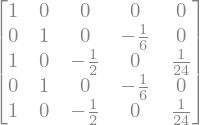

In [41]:
T = zeros(num_terms,num_terms)
for row in range(num_terms):
    for col in range(num_terms):
        func = fourier_functions[row]
        term = func.taylor_term(col, x)
        print(row, col, term)
        T[row, col] = term/(x**col)
T

Weird - the 3rd and 5th rows are identical
</br>
and so are the 2nd and 4th

Why is that?

In [42]:
fourier_functions[1]

In [43]:
fourier_functions[3]

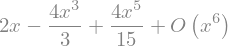

In [44]:
fourier_functions[3].series(x=x, x0=0, n=6)

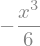

In [45]:
fourier_functions[3].taylor_term(3, x)

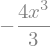

In [46]:
fourier_functions[3].series(x=x, x0=0, n=6).taylor_term(3,x)

Well, that's a lot slower, but at least it works

Looking at which function is called

In [47]:
fourier_functions[3].taylor_term

<function sympy.functions.elementary.trigonometric.sin.taylor_term(n, x, *previous_terms)>

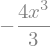

In [48]:
fourier_functions[3].taylor_term(3, 2*x)

Awesome!
</br>
Let's wrap it in a function

In [49]:
def build_T(num_terms: int):
    polynom_symbols = symbols(f"p_0:{num_terms}")
    fourier_symbols = symbols(f"f_0:{num_terms}")

    num_fourier_frequencies = math.ceil((num_terms-1)/2)

    fourier_functions = []
    for i in range(num_terms):
        frequency = (i+1) // 2
        if i%2 == 0:
            func = cos
        else:
            func = sin
        fourier_functions.append( func(frequency * x) )

    T = zeros(num_terms,num_terms)
    for row in range(num_terms):
        func = fourier_functions[row]
        func_taylor = func.series(x=x, x0=0, n=num_terms+1)
        for col in range(num_terms):
            term = func_taylor.taylor_term(col, x)
            factor_ = term/(x**col)
            T[row, col] = factor_.removeO()
    return T

Checking that it works, by comparing to the 3x3 example:

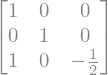

In [50]:
build_T(3)

And checking 5x5:

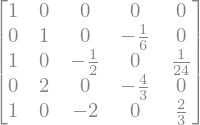

In [51]:
build_T(5)

Well, We can see a faster way to generate it:
</br>
We only need the 1st, 2nd, and 3rd rows
</br>
Any row below is just a copy of the 2nd/3rd, multiplied by something like $(2^0, 2^1, 2^2, 2^3, 2^4)$ (for the `frequency=2` rows)

## Next attept: 5x5 $\sqrt{D}$

Still looking for some magic way in which the Fourier basis will diagonalize the derivative matrix
</br>
even though the theory says that the Fourier basis diagonalizes the 2nd derivative, and not the 1st derivative

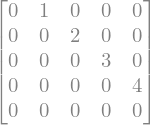

In [52]:
D5_p = build_D(5)
D5_p

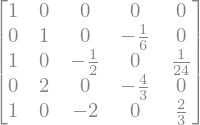

In [53]:
T5 = build_T(5)
T5

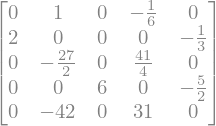

In [54]:
D5_f = T5.inv() * D5_p * T5
D5_f

Nope. That's not even close to diagonal.

Onto 2nd derivatives

## 3x3 2nd derivative

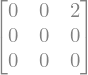

In [55]:
D3_p = build_D(3)
DD3_p = D3_p @ D3_p
DD3_p

Additionally, we know how to generate the 2nd derivative in the Fourier basis

### Generating 2nd derivative in Fourier basis

In [56]:
def build_DD_f(n):
    DD = zeros(n,n)
    for i in range(1, n):
        frequency = (i+1) // 2
        DD[i,i] = - frequency**2
    return DD

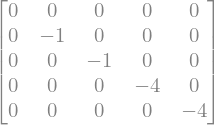

In [57]:
build_DD_f(5)

</br>
</br>
</br>
Now, let's try to compare the 2nd derivative in the polynomial basis to the Fourier basis
</br>
Even though I have little hopes, as `DD3_p` has a single non-zero term, and `DD3_f` has 2.
</br>
A transformation matrix can do it, but I don't find it likely

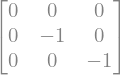

In [58]:
DD3_f = build_DD_f(3)
DD3_f

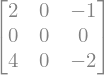

In [59]:
T3 = build_T(3)
T3.inv() * DD3_p * T3

Doesn't look promising..
</br>
How about 5x5?

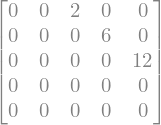

In [60]:
D5_p = build_D(5)
DD5_p = D5_p @ D5_p
DD5_p

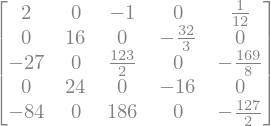

In [61]:
T5 = build_T(5)
T5.inv() * DD5_p * T5

Nope..
</br>
Weird
</br>
I guess infinite matrices are needed?

## Going big: 11x11

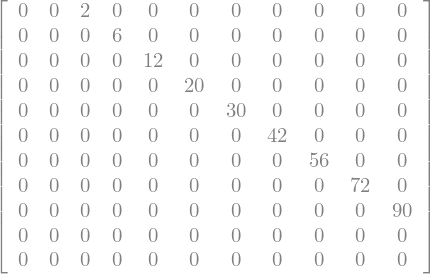

In [62]:
D11_p = build_D(11)
DD11_p = D11_p @ D11_p
DD11_p

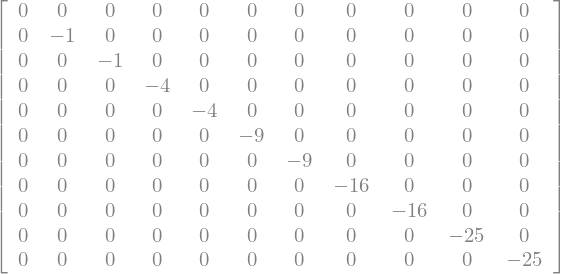

In [63]:
build_DD_f(11)

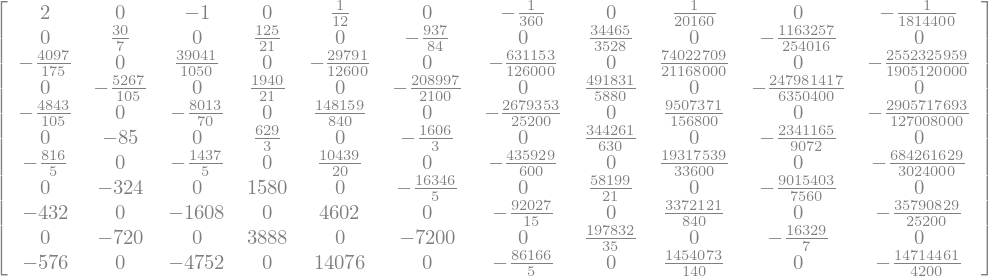

In [64]:
T11 = build_T(11)
T11.inv() * DD11_p * T11

Nope... :(

# Finding half-derivative

## Attempt \#1: Brute-force 3x3

Let's create a $3 \times 3$ derivative matrix, and a $3 \times 3$ parametrized matrix, and see if we can get the parametrized matrix squared to equal the derivative matrix

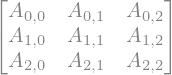

In [65]:
n = 3
A = Matrix([
    [Symbol(f"A_{row},{col}") for col in range(n)]
    for row in range(n)
])
A

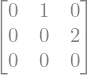

In [66]:
D = build_D(n)
D

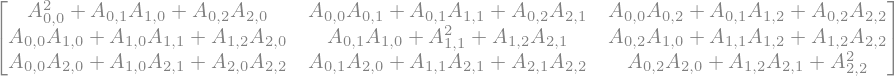

In [67]:
AA = A@A
AA

step 1: the diagonal of `D` is 0
</br>
so let's set all the $A_{i,j}^2$ terms to 0

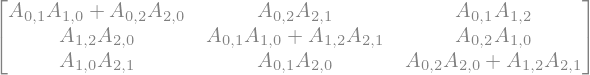

In [68]:
AA_1 = AA.subs({"A_0,0": 0, "A_1,1": 0, "A_2,2": 0})
AA_1

Step 2: let's see the terms in the diagonal to 0, while taking care not to set an off-diagonal term to 0

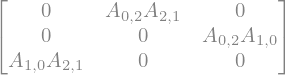

In [69]:
AA_2 = AA_1.subs({"A_0,1": 0, "A_2,0": 0, "A_1,2": 0})
AA_2

Now, we're stuck.
</br>
We cannot set the bottom-left term to 0 without setting either term to 0.
</br>
</br>
But maybe that's an artifact of us messing with finite matrices.
</br>
Let's look at larger matrices

## Attempt \#2: Brute-force 4x4

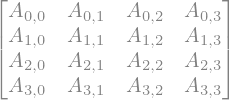

In [70]:
N = 4
A = Matrix([
    [Symbol(f"A_{row},{col}") for col in range(N)]
    for row in range(N)
])
A

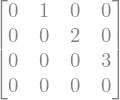

In [71]:
D = build_D(N)
D

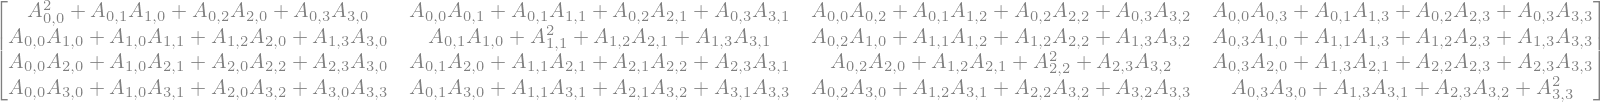

In [72]:
AA = A@A
AA

step 1 (no change in this step): the diagonal of `D` is 0
</br>
so let's set all the $A_{i,j}^2$ terms to 0

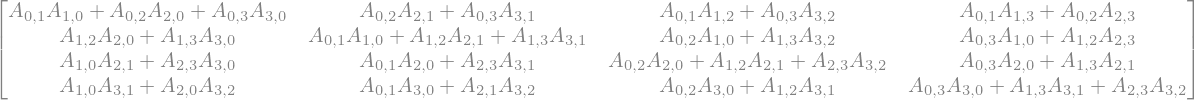

In [73]:
AA_1 = AA.subs({"A_0,0": 0, "A_1,1": 0, "A_2,2": 0, "A_3,3": 0})
AA_1

Step 2 (no change in this step): let's see the terms in the diagonal to 0, while taking care not to set an off-diagonal term to 0

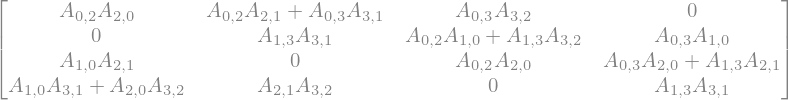

In [74]:
# remove terms from the diagonal, where they don't appear in the important off-diagonal
AA_2 = AA_1.subs({"A_0,1": 0, "A_3,0": 0, "A_1,2": 0, "A_2,3": 0})
AA_2

There are too many single-term multiplications
We probably set too many terms to be 0
</br>
</br>
Let's try a different method
</br>
New Step 2: try to set the off-diagonal values

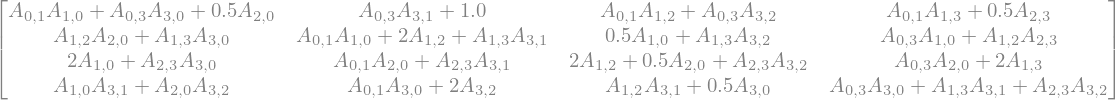

In [75]:
AA_2_1 = AA_1.subs({"A_0,2": 1/2, "A_2,1": 2})
AA_2_1

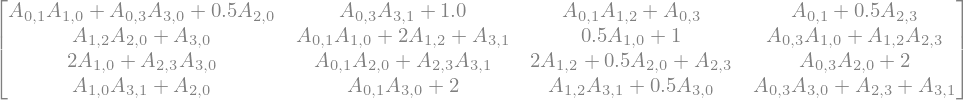

In [76]:
AA_2_2 = AA_2_1.subs({"A_1,3": 1, "A_3,2": 1})
AA_2_2

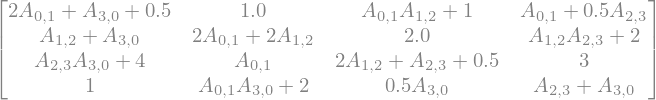

In [77]:
AA_2_3 = AA_2_2.subs({"A_0,3": 1, "A_3,1": 0, "A_1,0": 2, "A_2,0": 1})
AA_2_3

Step 3: Removing the other terms

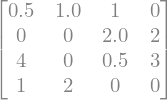

In [78]:
AA_3 = AA_2_3.subs({"A_0,1": 0, "A_3,0": 0, "A_1,2": 0, "A_2,3": 0})
AA_3

That didn't work that well...
</br>
Maybe we could dynamically solve it?

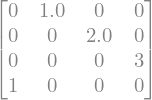

In [79]:
expected_AA_3 = zeros(4,4)
expected_AA_3[0,1] = AA_2_3[0,1]
expected_AA_3[1,2] = AA_2_3[1,2]
expected_AA_3[2,3] = AA_2_3[2,3]
expected_AA_3[3,0] = AA_2_3[3,0]
expected_AA_3

In [80]:
sol = solve(AA_2_3 - expected_AA_3)
sol

Well, that didn't work well...
</br>
</br>
It can be seen since, for example,
- the `[3,2]` term ($0.5 A_{3,0}$) requires $A_{3,0} = 0$
- the `[2,1]` term ($A_{0,1}$) requires $A_{0,1} = 0$
- the `[0,0]` term ($2 A_{0,1} + A_{3,0} + 0.5$) will be 0.5, that is, non-zero, if we satisfy both requirements

## Attempt: dynamically finding 3x3

### For the 2nd derivative

At this point, I wish to have some sanity check - to see that I can find the square root of a matrix in `sympy`

Thus, let's define the task for this sub-sub-section:
</br>
Find $M$ such that $M^2$ is the 2nd derivative matrix

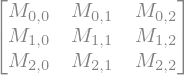

In [81]:
n = 3
M = Matrix([
    [Symbol(f"M_{row},{col}") for col in range(n)]
    for row in range(n)
])
M

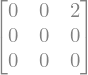

In [82]:
D = build_D(n)
expected = D@D
expected

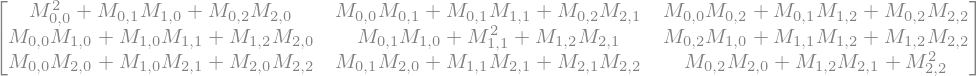

In [83]:
M@M

In [84]:
from time import time
start = time()

solution = solve(M@M - expected)

end = time()
print(f"It took {end-start} seconds")
solution

It took 130.5742061138153 seconds


Well, bummer.
</br>
It couldn't solve it..
</br>
</br>
However, we could help `sympy` a little bit:

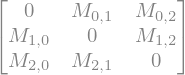

In [85]:
MM = M.subs({"M_0,0": 0, "M_1,1": 0, "M_2,2": 0})
MM

It took 0.06703948974609375 seconds


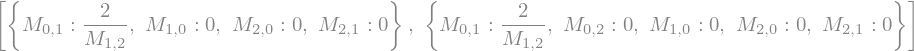

In [86]:
from time import time
start = time()

solution = solve(MM@MM - expected)

end = time()
print(f"It took {end-start} seconds")
solution

Awesome!
</br>
That's the solution!

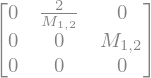

In [87]:
MM.subs(solution[1])

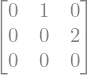

In [88]:
MM.subs(solution[1]).subs("M_1,2", 2)

Nice!

### For the 1st derivative

Starting again, this time, `expected = 1st derivative`

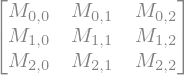

In [89]:
n = 3
M = Matrix([
    [Symbol(f"M_{row},{col}") for col in range(n)]
    for row in range(n)
])
M

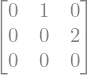

In [90]:
D = build_D(n)
expected = D
expected

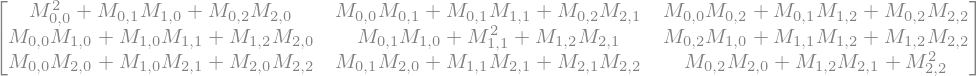

In [91]:
M@M

We can already see that the same "help" will be useful here

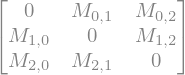

In [92]:
MM = M.subs({"M_0,0": 0, "M_1,1": 0, "M_2,2": 0})
MM

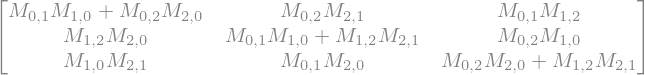

In [93]:
MM@MM

In [94]:
from time import time
start = time()

solution = solve(MM@MM - expected)

end = time()
print(f"It took {end-start} seconds")
solution

It took 0.021465063095092773 seconds


Bummer...

## Hypothetical Attempt

The last attempt failed just like the manual one

We require

- $M_{0,2} M_{2,1} = 1$
- $M_{0,2} M_{1,0} = 2$
- $M_{1,0} M_{2,1} = 0$

Which looks impossible...
</br>
As long as we don't mess with infinities

If we were to do something like:

- $M_{1,0} = \epsilon$
- $M_{2,1} = \frac \epsilon 2$
- $M_{0,2} = \frac 1 \epsilon$

And take $\lim_{\epsilon \rightarrow 0}$
</br>
Then we'd get the result we want!

However, I won't go down that path
</br>
At least not numerically

## Attempt \#3: Dynamically finding 5x5 2nd derivative

Having more success with finding the square root of $D^2$, let's give that another attempt

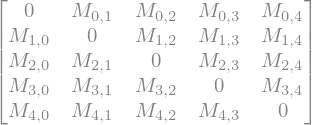

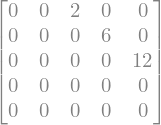

In [95]:
n = 5

# initialize M without diagonal
# since `(sqrt(D))^2` should equal `D`
# and `D` has 0 in the diagonal
# and `M^2` will have `(M_i,i)^2` along the diagoal entries
M = zeros(n,n)
for row in range(n):
    for col in range(n):
        if row == col:
            continue
        else:
            M[row,col] = Symbol(f"M_{row},{col}")
display(M)

coeff = list(filter(bool, list(M)))
display(coeff)


D = build_D(n)
expected = D@D
display(expected)

The cell below has been commented out, after it took more than 24 hours to run, and still didn't finish

In [96]:
# from time import time
# start = time()

# solution = solve(M@M - expected, coeff)

# end = time()
# print(f"It took {end-start} seconds")
# solution

## Attempt: sqrtm

While reading some book, a thought poped into my head - there surely is a way to take the square root of a matrix, in an already implemented way in some library.
</br>
And indeed, `scipy.linalg.sqrtm` was found

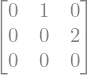

array([[0., 1., 0.],
       [0., 0., 2.],
       [0., 0., 0.]])

In [97]:
import scipy
from sympy import N

D = build_D(3)
display(D)

d = np.array(D, dtype=np.float64)
display(d)

In [98]:
scipy.linalg.sqrtm(d)

Failed to find a square root.


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [99]:
d_squared = d@d
d_squared

array([[0., 0., 2.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [100]:
scipy.linalg.sqrtm(d_squared)

Failed to find a square root.


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

Well, I was hoping for more from this function
</br>
But, oh well, it's not like I did much better ;)